<a href="https://colab.research.google.com/github/kevirui/Clasificacion-de-modelos-y-metricas/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definiendo datos y ejes

In [48]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/kevirui/Clasificacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv")
data

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [49]:
x = data.drop(columns='diabetes', axis=1)
y = data['diabetes']

# Determinando ejes de entrenamiento, validación y de prueba

In [50]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size=0.05, stratify=y, random_state=42)
x_val, x_train, y_val, y_train = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth=3)
forest = RandomForestClassifier(max_depth=2)

tree.fit(x_train, y_train)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

In [52]:
tree.score(x_train, y_train)

0.8404255319148937

In [53]:
tree.score(x_val, y_val)

0.625

In [54]:
forest.score(x_train, y_train)

0.7978723404255319

In [55]:
forest.score(x_val, y_val)

0.7107142857142857

# Matrices de Confusión para evaluar predicciones de cada modelo

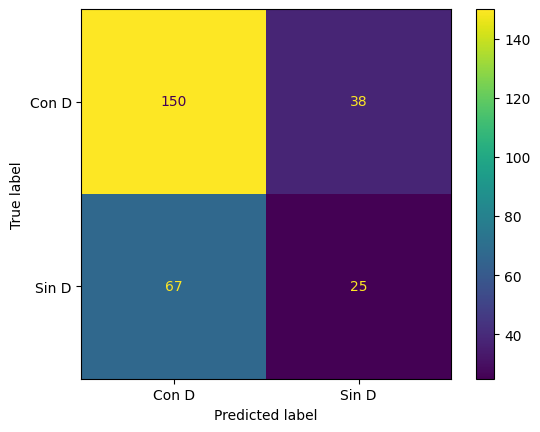

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, tree.predict(x_val), display_labels=['Con D', 'Sin D'])

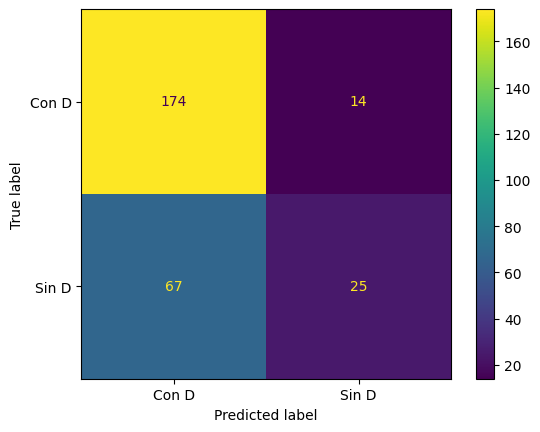

In [57]:
ConfusionMatrixDisplay.from_predictions(y_val, forest.predict(x_val), display_labels=['Con D', 'Sin D'])

# Evaluando metricas

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"La exactitud del tree model es: {accuracy_score(y_val, tree.predict(x_val))}")
print(f"La precisión del tree model es: {precision_score(y_val, tree.predict(x_val))}")
print(f"La sensibilidad del tree model es: {recall_score(y_val, tree.predict(x_val))}")
print(f"El F1 score del tree model es: {f1_score(y_val, tree.predict(x_val))}")
print("--------o---------")
print(f"La exactitud del forest model es: {accuracy_score(y_val, forest.predict(x_val))}")
print(f"La precisión del forest model es: {precision_score(y_val, forest.predict(x_val))}")
print(f"La sensibilidad del forest model es: {recall_score(y_val, forest.predict(x_val))}")
print(f"El F1 score del forest model es: {f1_score(y_val, forest.predict(x_val))}")

La exactitud del tree model es: 0.625
La precisión del tree model es: 0.3968253968253968
La sensibilidad del tree model es: 0.2717391304347826
El F1 score del tree model es: 0.3225806451612903
--------o---------
La exactitud del forest model es: 0.7107142857142857
La precisión del forest model es: 0.6410256410256411
La sensibilidad del forest model es: 0.2717391304347826
El F1 score del forest model es: 0.3816793893129771


In [59]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

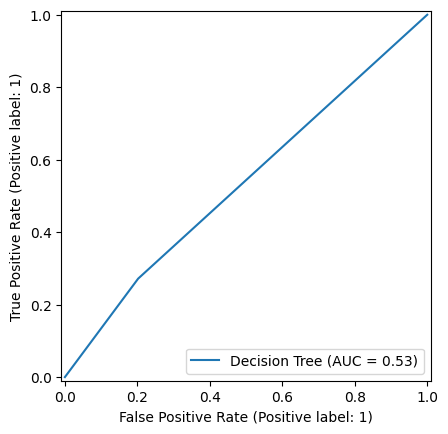

In [60]:
RocCurveDisplay.from_predictions(y_val, tree.predict(x_val), name='Decision Tree')

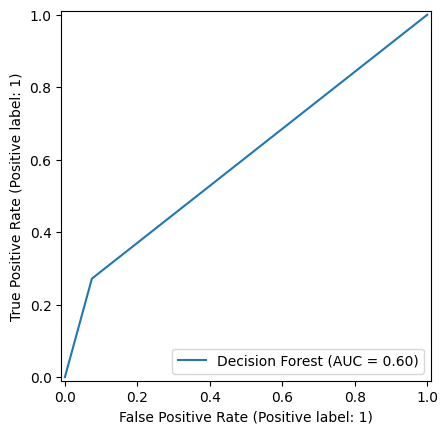

In [61]:
RocCurveDisplay.from_predictions(y_val, forest.predict(x_val), name='Decision Forest')

In [62]:
print(f"The area under ROC courve on Tree model: {roc_auc_score(y_val, tree.predict(x_val))}")
print(f"The area under ROC courve on Forest model: {roc_auc_score(y_val, forest.predict(x_val))}")

The area under ROC courve on Tree model: 0.5348057354301573
The area under ROC courve on Forest model: 0.5986355226641998


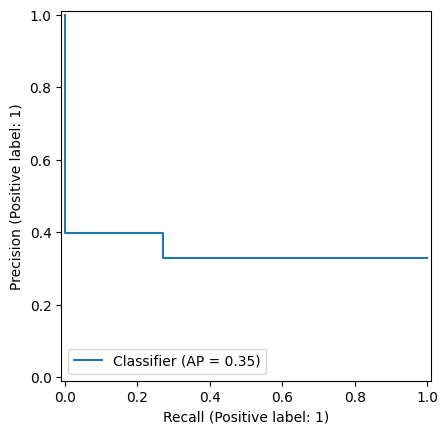

In [63]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_predictions(y_val, tree.predict(x_val));

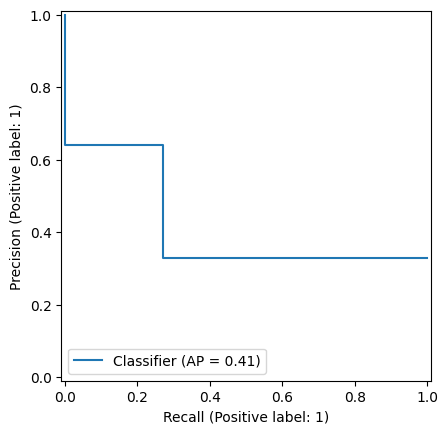

In [64]:
PrecisionRecallDisplay.from_predictions(y_val, forest.predict(x_val));

In [65]:
print(f"El score promedio de precisión vs recall en Tree Model es: {average_precision_score(y_val, tree.predict(x_val))}")

El score promedio de precisión vs recall en Tree Model es: 0.34711870255348515


In [66]:
print(f"El score promedio de precisión vs recall en Forest Model es: {average_precision_score(y_val, forest.predict(x_val))}")

El score promedio de precisión vs recall en Forest Model es: 0.41347746456442114


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_val, tree.predict(x_val)))
print(classification_report(y_val, forest.predict(x_val)))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       188
           1       0.40      0.27      0.32        92

    accuracy                           0.62       280
   macro avg       0.54      0.53      0.53       280
weighted avg       0.59      0.62      0.60       280

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       188
           1       0.64      0.27      0.38        92

    accuracy                           0.71       280
   macro avg       0.68      0.60      0.60       280
weighted avg       0.70      0.71      0.67       280



# Definiciones cruzadas

In [68]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

kf = KFold(n_splits=10, shuffle=True, random_state=5)
resultados_tree = cross_val_score(tree, x, y, cv=kf)
resultados_forest = cross_val_score(forest, x, y, cv=kf)

def intervalo_confianza(resultado, modelo):
  media = resultado.mean()
  std = resultado.std()
  print(f"Intervalo de confianza ({modelo}): [{media-2*std}, {min(media+2*std, 1)}]")

In [69]:
intervalo_confianza(resultados_tree, 'Decision Tree')
intervalo_confianza(resultados_forest, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.5208783048701277, 0.8785527050871983]
Intervalo de confianza (Random Forest): [0.532055301629221, 0.8302491080436097]


In [70]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados_tree = cross_val_score(tree, x, y, cv=skf, scoring='f1')
resultados_forest = cross_val_score(forest, x, y, cv=skf, scoring='f1')

intervalo_confianza(resultados_tree, 'Decision Tree')
intervalo_confianza(resultados_forest, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.34475350305254676, 0.7104586665474946]
Intervalo de confianza (Random Forest): [0.1384068359960776, 0.5982930636914382]


In [72]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
resultados_tree = cross_val_score(tree, x, y, cv=loo)
resultados_forest = cross_val_score(forest, x, y, cv=loo)

print(f"Precisión media (Decision Tree): {resultados_tree.mean()}")
print(f"Precisión media (Random Forest): {resultados_forest.mean()}")

Precisión media (Decision Tree): 0.7085561497326203
Precisión media (Random Forest): 0.6925133689839572
